In [1]:
#These are the imports you will need in order to recreate my process
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")
from acquire import get_telco_churn_data
from prepare import prep_telco_data

In [2]:
#You first want to assign the prep and acquire files to the train, validate, test functions so they can be callable later
train, validate, test = prep_telco_data(get_telco_churn_data())

In [3]:
#I did describe here just so I can get a high level view of all the data
train.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,monthly_charges,total_charges,has_churned,is_male,has_dependents,has_partner,has_phone,has_dsl,has_fiber,no_internet,has_monthly,has_annual,has_two_year,only_phone,only_internet,has_multiple
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.161552,32.491504,1.853665,1.685011,65.165813,2299.516219,0.265280,0.505960,0.301040,0.481359,0.903119,0.355313,0.435709,0.208978,0.550596,0.213797,0.235607,0.474005,0.096881,0.429115
std,0.368086,24.670438,0.736895,0.828951,29.802376,2275.207101,0.441538,0.500028,0.458768,0.499716,0.295833,0.478669,0.495912,0.406630,0.497497,0.410037,0.424432,0.499387,0.295833,0.495013
min,0.000000,0.000000,1.000000,1.000000,18.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,1.000000,39.650000,401.675000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,2.000000,1.000000,70.350000,1414.800000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,2.000000,2.000000,89.800000,3859.275000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,3.000000,3.000000,118.350000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Info provides us with all the columns, nulls, and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5721 to 6867
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3943 non-null   object 
 1   senior_citizen            3943 non-null   int64  
 2   tenure                    3943 non-null   int64  
 3   multiple_lines            3943 non-null   object 
 4   internet_service_type_id  3943 non-null   int64  
 5   contract_type_id          3943 non-null   int64  
 6   monthly_charges           3943 non-null   float64
 7   total_charges             3943 non-null   float64
 8   contract_type             3943 non-null   object 
 9   internet_service_type     3943 non-null   object 
 10  has_churned               3943 non-null   int64  
 11  is_male                   3943 non-null   int64  
 12  has_dependents            3943 non-null   int64  
 13  has_partner               3943 non-null   int64  
 14  has_p

In [5]:
#I ran a value counts to see the spread of those that churned vs did not churn
train.has_churned.value_counts()

0    2897
1    1046
Name: has_churned, dtype: int64

In [6]:
#I wanted to see all the unique columns and the amount of different values in them
train.nunique()

customer_id                 3943
senior_citizen                 2
tenure                        73
multiple_lines                 3
internet_service_type_id       3
contract_type_id               3
monthly_charges             1326
total_charges               3761
contract_type                  3
internet_service_type          3
has_churned                    2
is_male                        2
has_dependents                 2
has_partner                    2
has_phone                      2
has_dsl                        2
has_fiber                      2
no_internet                    2
has_monthly                    2
has_annual                     2
has_two_year                   2
only_phone                     2
only_internet                  2
has_multiple                   2
dtype: int64

In [7]:
#This code allowed all my graphs to be the same size and font so I don't have to repeat it several times
plt.rc('figure', figsize=(15, 10))
plt.rc('font', size= 15)

Text(0, 0.5, 'Monthly Charges')

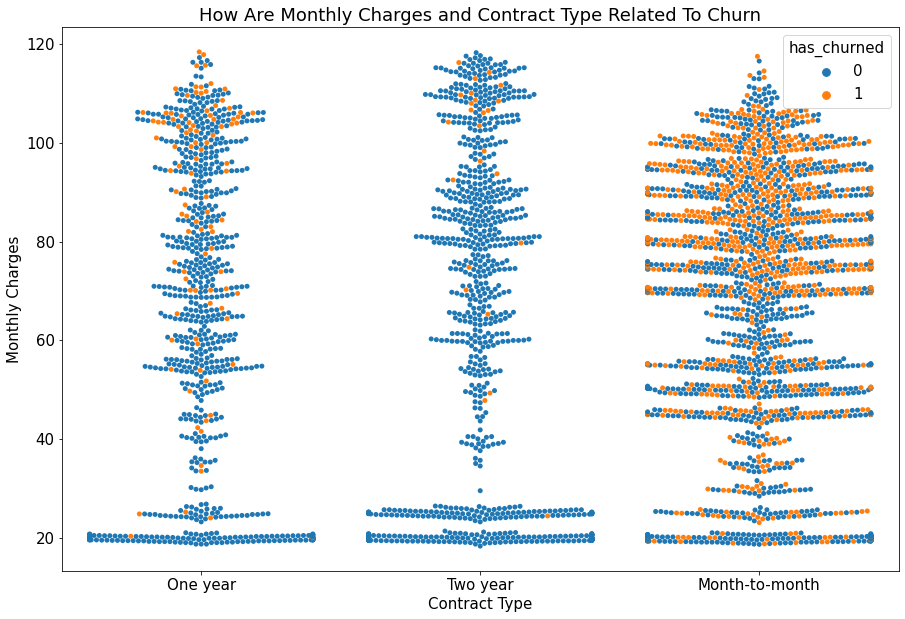

In [8]:
#I wanted to see the correlation between customers who churned. how much they were paying and the contract type they had
#Based on the graph, I intrepeted that majority of the churn is occuring in the month to month contracts
#I then wanted to dig deeper and look at why
sns.swarmplot(x= 'contract_type', y= 'monthly_charges', data = train, hue= 'has_churned')

plt.title('How Are Monthly Charges and Contract Type Related To Churn')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')

Text(0, 0.5, 'Monthly Charges')

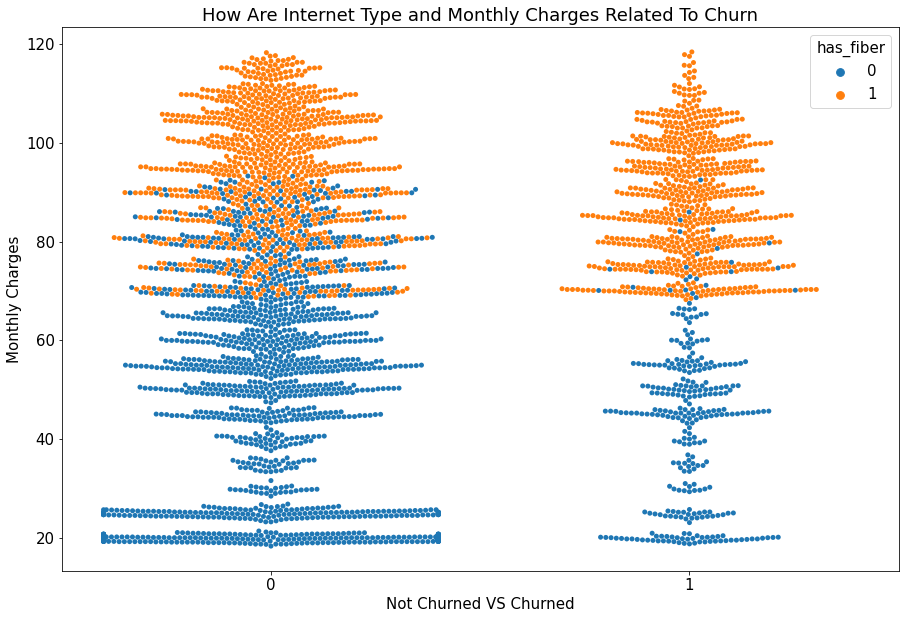

In [9]:
#Here I am doing a simliar comparison but against those who churned vs those who have internet based on dsl vs fiber
plt.title('How Are Internet Type and Monthly Charges Related To Churn')
sns.swarmplot(x= 'has_churned', y= 'monthly_charges', data = train, hue= 'has_fiber')
plt.xlabel('Not Churned VS Churned')
plt.ylabel('Monthly Charges')


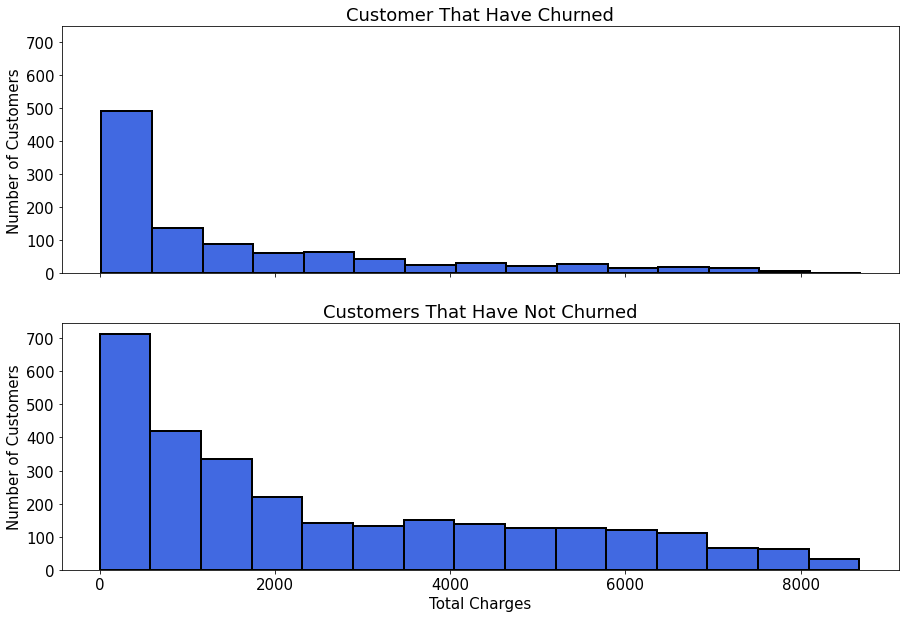

In [97]:
#This graph is to reflect on the amount of money a customer spent in total before churning and how much current
# customer have spent thus far.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

ax1.hist(train[train.has_churned == 1].total_charges, bins=15, 
         color='royalblue', ec='black', linewidth=2)

ax1.set(title='Customer That Have Churned', ylabel='Number of Customers')

ax2.hist(train[train.has_churned == 0].total_charges, bins=15, 
         color='royalblue', ec='black', linewidth=2)

ax2.set(title='Customers That Have Not Churned', xlabel='Total Charges', ylabel='Number of Customers')

plt.show()

Text(109.0, 0.5, '')

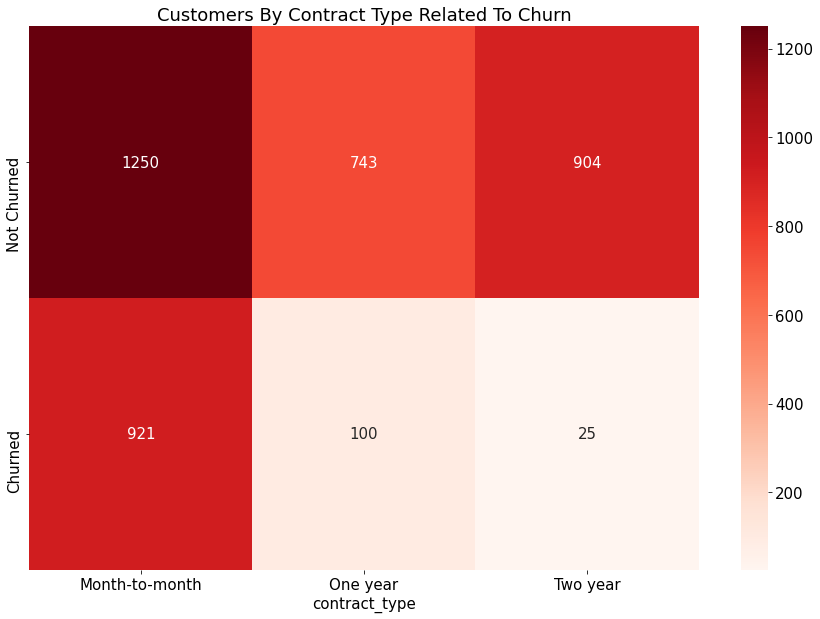

In [11]:
#Here I wanted to do a heatmap that would provide a visual of all those that churned vs not churned based on contract type
#We can see that all the churn is coming from month to month, but majority of the not churned is also month to month
#Making month to month more efficient would ideally increase revenue as customers do prefer this option, based on the data
crosstab = pd.crosstab(train.has_churned, train['contract_type'])
sns.heatmap(crosstab, annot= True, cmap= 'Reds', fmt= 'd')

plt.title('Customers By Contract Type Related To Churn')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Churned', 'Churned'))
plt.ylabel('')

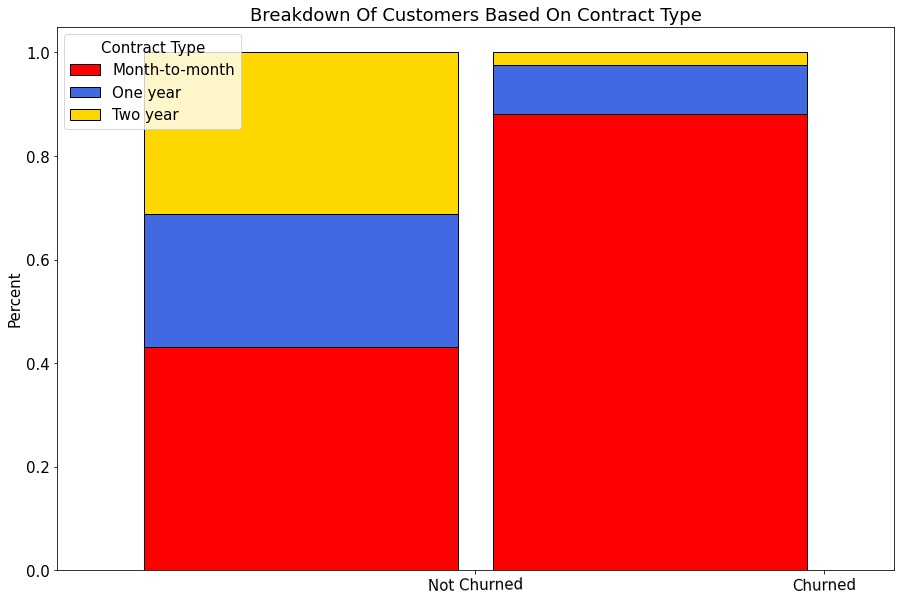

In [98]:
#This graph here iterates the same information above but in a better comparison format
# I noticed that in the churned customers column, month to month churn is the most predominant
(train.groupby('has_churned')['contract_type'].apply(lambda vcounts: vcounts.value_counts(normalize=True)).unstack()                                        
    .plot.bar(stacked=True, 
              width=.9, 
              color=['red', 'royalblue', 'gold'], 
              ec='black'))

plt.title('Breakdown Of Customers Based On Contract Type')

plt.xticks(rotation= 1)
plt.xticks(locs, ('Not Churned', 'Churned'))
plt.xlabel('')
plt.ylabel('Percent')

plt.legend(title='Contract Type')

plt.show()

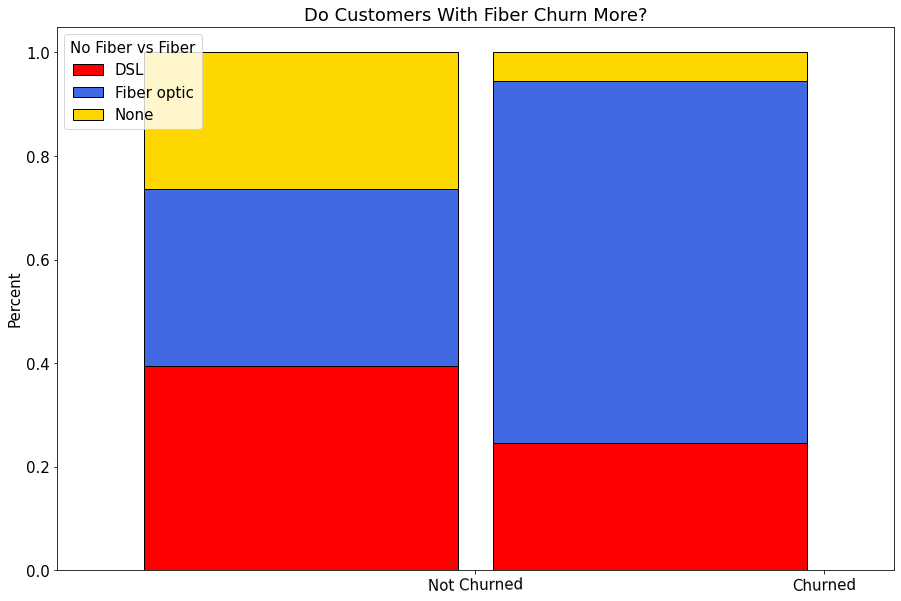

In [101]:
#Then I wanted to see churn based on internet type since most of the churn was coming from internet customers
#In this chart I found that fiber is the more predominant churned customer compared to the population
(train.groupby('has_churned')['internet_service_type'].apply(lambda vcounts: vcounts.value_counts(normalize=True)).unstack()                                        
    .plot.bar(stacked=True, 
              width=.9, 
              color=['red', 'royalblue', 'gold'], 
              ec='black'))                 

plt.title('Do Customers With Fiber Churn More?')

plt.xticks(rotation= 1)
plt.xticks(locs, ('Not Churned', 'Churned'))
plt.xlabel('')
plt.ylabel('Percent')

plt.legend(title='No Fiber vs Fiber')

plt.show()

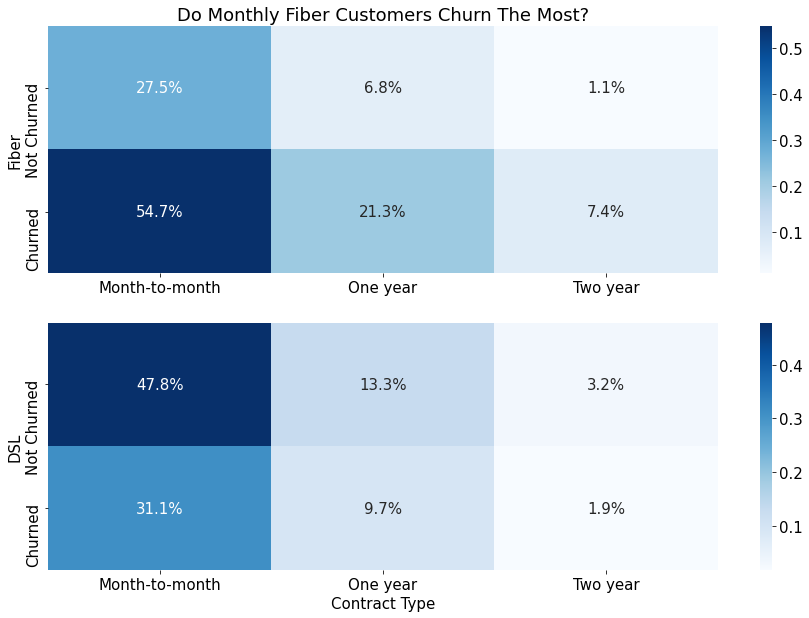

In [88]:
#Here I wanted to compare fiber and dsl churn so I created heatmaps to compare the two together
#Month to Month Fiber customers had the most churn and beat dsl by over 20 percent
#Takeaway: Month to Month Fiber customers are churning in greater numbers than any other area
plt.subplot(211)
train.groupby(['has_fiber', 'contract_type']).has_churned.mean()

crosstab = pd.crosstab(train.has_fiber, train.contract_type, values=train.has_churned, aggfunc='mean')
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='.1%')

plt.title('Do Monthly Fiber Customers Churn The Most?')
plt.xlabel('')
plt.yticks(locs, ('Not Churned', 'Churned'))
plt.ylabel('Fiber')

plt.subplot(212)
train.groupby(['has_dsl', 'contract_type']).has_churned.mean()

ctab = pd.crosstab(train.has_dsl, train.contract_type, values=train.has_churned, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Blues', fmt='.1%')

plt.xlabel('Contract Type')
plt.yticks(locs, ('Not Churned', 'Churned'))
plt.ylabel('DSL')

plt.show()

### Hypothesis Testing

H0: There is no difference in monthly charges between fiber customers compared to all customers

Ha: There is a difference in monthly charges between fiber customers and customers in general

In [15]:
#Here I wanted to test if there was a significant difference between month to month charges and the average month to month
#Our low p value shows that there is a difference
#We will reject the null and continue digging deeper into monthly charges
alpha= .05
monthly = train[train.contract_type == 'Month-to-month']
t, p = stats.ttest_1samp(monthly.monthly_charges, train.monthly_charges.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 2.777
p = 0.006


In [16]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: True


### Second Hypothesis Test
H0: Churn is independent of type of internet a customer buys

Ha: Churn is not independent of type of internet a customer buys

In [17]:
#Here I created a crosstab to compare fiber customers to churned customers
#Majority of customers have no churned with fiber
#TP: 1911
#FP: 314
#FN: 986
#TN: 732
crosstab = pd.crosstab(train.has_fiber, train.has_churned)
crosstab

has_churned,0,1
has_fiber,,
0,1911,314
1,986,732


In [18]:
Chi2, p, degf, expected = stats.chi2_contingency(crosstab)

In [19]:
#Our P value returned to be very low, so we are going to reject the null that these two columns are independent of eachother
#We are now ready to start modeling around month to month fiber customers
print(f'Our p-value is {p}.')

Our p-value is 1.6419945699041462e-89.


In [20]:
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is less than our alpha: True


In [21]:
#Before we start modeling, we want to establish our baseline
#In this case our baseline is 73% of customers did not churn
#Since we are creating a model to predict churn, I want to at least be able to beat the 73 percent for not churned
#This will solidify that my model is even better at predicting churn than customers who will stay
train.has_churned.value_counts(normalize=True)

0    0.73472
1    0.26528
Name: has_churned, dtype: float64

In [22]:
train.head()

,customer_id,senior_citizen,tenure,multiple_lines,internet_service_type_id,contract_type_id,monthly_charges,total_charges,contract_type,internet_service_type,...,has_phone,has_dsl,has_fiber,no_internet,has_monthly,has_annual,has_two_year,only_phone,only_internet,has_multiple
5721,9442-JTWDL,0,11,No,3,2,20.05,237.70,One year,None,...,1,0,0,1,0,1,0,1,0,0
4504,2673-ZALNP,0,7,No,3,2,19.90,173.15,One year,None,...,1,0,0,1,0,1,0,1,0,0
4978,1676-MQAOA,0,72,No,1,3,75.10,5336.35,Two year,DSL,...,1,1,0,0,0,0,1,1,0,0
3331,9992-UJOEL,0,2,No,1,1,50.30,92.75,Month-to-month,DSL,...,1,1,0,0,1,0,0,1,0,0
3607,7850-VWJUU,0,23,No,2,1,75.00,1778.50,Month-to-month,Fiber optic,...,1,0,1,0,1,0,0,1,0,0


In [23]:
#Here I am calibrating my model to assess only the columns I want to assess by dropping the wants I do not
#Since our baseline is the likelihood of a customer will not churn, then we will want to capture data that will
#predict the inverse, which is customers who will churn
x_train = train.drop(columns=['senior_citizen', 'has_multiple', 'only_internet', 'only_phone', 'customer_id', 'multiple_lines', 'contract_type', 'internet_service_type', 'internet_service_type_id', 'is_male', 'has_dependents', 'has_partner', 'has_phone', 'has_churned'])
y_train = train[['has_churned']]

#I did the same step for validate and test so the data is consistent
x_validate = validate.drop(columns=['senior_citizen','has_multiple', 'only_internet', 'only_phone', 'customer_id', 'multiple_lines', 'contract_type', 'internet_service_type', 'internet_service_type_id', 'is_male', 'has_dependents', 'has_partner', 'has_phone', 'has_churned'])
y_validate = validate[['has_churned']]

x_test = test.drop(columns=['senior_citizen','has_multiple', 'only_internet', 'only_phone', 'customer_id', 'multiple_lines', 'contract_type', 'internet_service_type', 'internet_service_type_id', 'is_male', 'has_dependents', 'has_partner', 'has_phone', 'has_churned'])
y_test = test[['has_churned']]

# Logistic Regression Model

In [24]:
#The first model was for logistic regression
#Here we are returning our columns, coefficients, and intercepts
logit = LogisticRegression(random_state=123)
logit.fit(x_train, y_train)
print('Columns:', x_train.columns )
print('Coefficient:', logit.coef_)
print('Intercept:', logit.intercept_)

Columns: Index(['tenure', 'contract_type_id', 'monthly_charges', 'total_charges',
       'has_dsl', 'has_fiber', 'no_internet', 'has_monthly', 'has_annual',
       'has_two_year'],
      dtype='object')
Coefficient: [[-4.94766235e-02 -7.89853227e-01  1.66387453e-02  2.07115077e-04
  -2.46008971e-01  2.88185915e-01 -2.78742723e-01  1.13355510e-01
  -1.46555127e-01 -2.03366161e-01]]
Intercept: [-0.2365774]


In [25]:
#Here I wanted to create prediciton and actual columns for the model to return the probabilities
train_eval = train[['has_churned']].rename(columns={'has_churned': 'actual'})

train_eval['predict'] = logit.predict(x_train)

train_eval['probs'] = logit.predict_proba(x_train)[:, 1]

train_eval.head()

,actual,predict,probs
5721,0,0,0.082945
4504,0,0,0.097885
4978,0,0,0.013884
3331,0,0,0.400856
3607,0,0,0.463418


In [26]:
#Repeating the same process here
validate_eval = validate[['has_churned']].rename(columns={'has_churned': 'actual'})

validate_eval['predict'] = logit.predict(x_validate)

validate_eval['probs'] = logit.predict_proba(x_validate)[:, 1]

validate_eval.head()

,actual,predict,probs
557,1,1,0.632499
3860,1,1,0.673523
4961,0,0,0.009343
5895,0,0,0.003835
432,1,0,0.415897


In [27]:
#Same process as above but for the test samples
test_eval = test[['has_churned']].rename(columns={'has_churned': 'actual'})

test_eval['predict'] = logit.predict(x_test)

test_eval['probs'] = logit.predict_proba(x_test)[:, 1]

test_eval.head()

,actual,predict,probs
3892,0,0,0.244187
1939,0,0,0.294802
5380,1,0,0.198670
4362,0,0,0.288670
628,1,1,0.619027


In [28]:
print('Accuracy:', logit.score(x_train, y_train))

Accuracy: 0.7872178544255642


In [29]:
print('recall:', recall_score(train_eval.actual, train_eval.predict, average=None))

recall: [0.89540904 0.4875717 ]


In [30]:
print('precision :', precision_score(train_eval.actual, train_eval.predict, average=None))

precision : [0.82875399 0.62730627]


In [31]:
confusion_matrix(y_true=train_eval.actual, y_pred=train_eval.predict)

array([[2594,  303],
       [ 536,  510]])

In [32]:
#Our model preformed very well compared to my expectations
#It does appear that if we assess customers who are internet customers, based on contract type and monthly charges,
#our model can accurately predict who will churn
print(classification_report(y_true=train_eval.actual, y_pred=train_eval.predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2897
           1       0.63      0.49      0.55      1046

    accuracy                           0.79      3943
   macro avg       0.73      0.69      0.70      3943
weighted avg       0.78      0.79      0.78      3943



In [33]:
print('Accuracy of Logistic Regression Model on training set: {:.2f}'
     .format(logit.score(x_train, y_train)))

Accuracy of Logistic Regression Model on training set: 0.79


In [34]:
#Here the model showed improvement from the last so we do have a solid option here if the others do not perform
print(classification_report(y_true=validate_eval.actual, y_pred=validate_eval.predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1242
           1       0.65      0.50      0.57       449

    accuracy                           0.80      1691
   macro avg       0.74      0.70      0.72      1691
weighted avg       0.79      0.80      0.79      1691



In [35]:
print('Accuracy of Logistic Regression Model classifier on validate set: {:.2f}'
     .format(logit.score(x_validate, y_validate)))

Accuracy of Logistic Regression Model classifier on validate set: 0.80


# Logistic Regression Takeaways
This model preformed fairly well at predicting if a customer will not churn
The accuracy was almost 6 percent above the baseline with a recall of 91 percent
I can say this is a fairly decent starting point, but I did want to see if I can do better with another model

# Decision Tree Model

In [36]:
#First we need to assigned the decision tree classifier to a function we can call
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [37]:
#Then we're going to fit the calibrated samples to the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [38]:
#Now we're going to establish an array of predictions
y_pred = clf.predict(x_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [39]:
#Here we will provide an array of probabilities for each customer in this sample
#This will predict if a customer will churn
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.93235832, 0.06764168],
       [0.93235832, 0.06764168],
       [0.98857143, 0.01142857],
       [0.58866995, 0.41133005],
       [0.58024691, 0.41975309]])

In [40]:
confusion_matrix(y_train, y_pred)

array([[2732,  165],
       [ 666,  380]])

In [41]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [42]:
#Based on the train data, the decision tree model is a solid contender to beat our logistic regression model
#It had a high precision, recall, and f1-score
#The accuracies was also better, almost reaching 80 percent accurate
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2897
           1       0.70      0.36      0.48      1046

    accuracy                           0.79      3943
   macro avg       0.75      0.65      0.67      3943
weighted avg       0.78      0.79      0.76      3943



In [43]:
#Here we will do the same but on the validate data
clf.fit(x_validate, y_validate)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [44]:
y_pred = clf.predict(x_validate)
y_pred[0:5]

array([1, 1, 0, 0, 0])

In [45]:
y_pred_proba = clf.predict_proba(x_validate)
y_pred_proba[0:5]

array([[0.2887931 , 0.7112069 ],
       [0.2887931 , 0.7112069 ],
       [0.96745027, 0.03254973],
       [0.96745027, 0.03254973],
       [0.55      , 0.45      ]])

In [46]:
confusion_matrix(y_validate, y_pred)

array([[1175,   67],
       [ 282,  167]])

In [47]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(x_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [48]:
#We've shown solid improvement from our train dataset and it shows to be the most promising model yet
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1242
           1       0.71      0.37      0.49       449

    accuracy                           0.79      1691
   macro avg       0.76      0.66      0.68      1691
weighted avg       0.78      0.79      0.77      1691



# MVP Model

In [49]:
#The last step in this modeling process is we are going to run the model against our test set (unseen data)
clf.fit(x_test, y_test)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [50]:
y_pred = clf.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 1])

In [51]:
y_pred_proba = clf.predict_proba(x_test)
y_pred_proba[0:5]

array([[0.61691542, 0.38308458],
       [0.77446809, 0.22553191],
       [0.82738095, 0.17261905],
       [0.51485149, 0.48514851],
       [0.28773585, 0.71226415]])

In [52]:
confusion_matrix(y_test, y_pred)

array([[974,  61],
       [223, 151]])

In [53]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on validate set: 0.80


In [54]:
#After all the modeling we have done, this model is the winner
#Not only did it have slight imporvements as we progressed, the accuracy broke the 80 percent threshold,
#which was my goal in the beginning
#we now have a model that can fairly accurately predict whether a customer will not churn
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1035
           1       0.71      0.40      0.52       374

    accuracy                           0.80      1409
   macro avg       0.76      0.67      0.69      1409
weighted avg       0.79      0.80      0.78      1409



# Random Forest Model

In [55]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [56]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [57]:
print(rf.feature_importances_)

[0.17597744 0.20172553 0.05802673 0.06415642 0.01172202 0.17074042
 0.03095007 0.21937739 0.01535389 0.05197009]


In [58]:
y_pred = rf.predict(x_train)

In [59]:
y_pred_proba = rf.predict_proba(x_train)

In [60]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.79


In [61]:
print(confusion_matrix(y_train, y_pred))

[[2699  198]
 [ 626  420]]


In [62]:
#This model also had decent results, none of the models seem to be far off from eachother
#However, this model is not as good as the Decision Tree so we're going to continue on
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2897
           1       0.68      0.40      0.50      1046

    accuracy                           0.79      3943
   macro avg       0.75      0.67      0.69      3943
weighted avg       0.78      0.79      0.77      3943



In [63]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.79


In [64]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(x_test, y_test)))

Accuracy of random forest classifier on validate set: 0.80


# KNN Model

In [65]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [66]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn.predict(x_train)

In [68]:
y_pred_proba = knn.predict_proba(x_train)

In [69]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [70]:
print(confusion_matrix(y_train, y_pred))

[[2693  204]
 [ 462  584]]


In [71]:
#This model actually had significant improvement and may be a contender in beating the decision tree model
#We can check the accuracy quickly to see if it stays consistent on the validate sample set
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2897
           1       0.74      0.56      0.64      1046

    accuracy                           0.83      3943
   macro avg       0.80      0.74      0.76      3943
weighted avg       0.82      0.83      0.82      3943



In [72]:
#Unfortunately, the accuracy did drop by 7 percent, this is not going to be a viable options and Decision Tree Model will be our best
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(x_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.76


# Convert to CSV and apply to dataframe 

In [73]:
x_train.head()

,tenure,contract_type_id,monthly_charges,total_charges,has_dsl,has_fiber,no_internet,has_monthly,has_annual,has_two_year
5721,11,2,20.05,237.70,0,0,1,0,1,0
4504,7,2,19.90,173.15,0,0,1,0,1,0
4978,72,3,75.10,5336.35,1,0,0,0,0,1
3331,2,1,50.30,92.75,1,0,0,1,0,0
3607,23,1,75.00,1778.50,0,1,0,1,0,0


In [74]:
#Because the prepare file was for modeling, I had to copy and paste the code to filter the data here
#This was done for sake of time, rather than going back and recoding the train, validate, test split in a separate function

telco = get_telco_churn_data()
telco['has_churned'] = telco.churn.map({'No': 0, 'Yes': 1})
telco['is_male'] = telco.gender.map({'Male' : 1, 'Female': 0})
telco['has_dependents'] = telco.dependents.map({'Yes' : 1, 'No': 0})
telco['has_partner'] = telco.partner.map({'Yes' : 1, 'No': 0})
telco['has_phone'] = telco.phone_service.map({'Yes' : 1, 'No': 0})

telco = telco.drop(columns = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'payment_type_id', 'gender', 'dependents', 'phone_service', 'churn', 'partner'])
telco = telco.loc[:,~telco.columns.duplicated()]

telco.total_charges = telco.total_charges.str.replace(' ', '0').astype(float)

telco_dummies1 = pd.get_dummies(telco.internet_service_type)
telco_dummies2 = pd.get_dummies(telco.contract_type)
telco_dummies3 = pd.get_dummies(telco.multiple_lines)

telco = pd.concat([telco, telco_dummies1, telco_dummies2, telco_dummies3], axis = 1)
telco = telco.rename(columns = {'DSL':'has_dsl', 'Fiber optic': 'has_fiber', 'None': 'no_internet', 'Month-to-month': 'has_monthly', 'One year': 'has_annual', 'Two year': 'has_two_year', 'No': 'only_phone', 'No phone service': 'only_internet', 'Yes': 'has_multiple'})

In [75]:
#Here I am renaming the Decision tree function to best model for sake of clarity
best_model = clf
#I am removing the columns that are not needed for the predicitons
x = telco[['tenure', 'contract_type_id', 'monthly_charges', 'total_charges', 'has_dsl', 'has_fiber', 'no_internet', 'has_monthly', 'has_annual', 'has_two_year']]
#Here we are adding a column that will predict that a customer will churn
telco['prediction'] = best_model.predict(x)

In [83]:
#Here we are adding the final column that will provide the precent likelihood that a customer will churn for each customer
telco['probability'] = best_model.predict_proba(x)[:,1]
telco.head()

,customer_id,senior_citizen,tenure,multiple_lines,internet_service_type_id,contract_type_id,monthly_charges,total_charges,contract_type,internet_service_type,...,has_fiber,no_internet,has_monthly,has_annual,has_two_year,only_phone,only_internet,has_multiple,prediction,probability
0,0003-MKNFE,0,9,Yes,1,1,59.9,542.40,Month-to-month,DSL,...,0,0,1,0,0,0,0,1,0,0.225532
1,0013-MHZWF,0,9,No,1,1,69.4,571.45,Month-to-month,DSL,...,0,0,1,0,0,1,0,0,0,0.225532
2,0015-UOCOJ,1,7,No,1,1,48.2,340.35,Month-to-month,DSL,...,0,0,1,0,0,1,0,0,0,0.225532
3,0023-HGHWL,1,1,No phone service,1,1,25.1,25.10,Month-to-month,DSL,...,0,0,1,0,0,0,1,0,0,0.485149
4,0032-PGELS,0,1,No phone service,1,1,30.5,30.50,Month-to-month,DSL,...,0,0,1,0,0,0,1,0,0,0.485149


In [77]:
#Lastly, we will create a csv file that will capture this model in it's final form and applied to the data
telco[['customer_id', 'prediction', 'probability']].to_csv('predictions.csv')

In [78]:
#Here is a comparison that is easier to view of the probability of each customer churning or not
telco[['customer_id', 'prediction', 'probability']]

,customer_id,prediction,probability
0,0003-MKNFE,0,0.225532
1,0013-MHZWF,0,0.225532
2,0015-UOCOJ,0,0.225532
3,0023-HGHWL,0,0.485149
4,0032-PGELS,0,0.485149
...,...,...,...
7038,9950-MTGYX,0,0.011364
7039,9953-ZMKSM,0,0.011364
7040,9964-WBQDJ,0,0.011364
7041,9972-EWRJS,0,0.011364


In [79]:
#This is a useful way for marketing campaigns to be ran on customers that are at least 50 percent likely to churn
telco[telco.probability > .50]

,customer_id,senior_citizen,tenure,multiple_lines,internet_service_type_id,contract_type_id,monthly_charges,total_charges,contract_type,internet_service_type,...,has_fiber,no_internet,has_monthly,has_annual,has_two_year,only_phone,only_internet,has_multiple,prediction,probability
471,0004-TLHLJ,0,4,No,2,1,73.90,280.85,Month-to-month,Fiber optic,...,1,0,1,0,0,1,0,0,1,0.712264
472,0011-IGKFF,1,13,No,2,1,98.00,1237.85,Month-to-month,Fiber optic,...,1,0,1,0,0,1,0,0,1,0.712264
473,0013-EXCHZ,1,3,No,2,1,83.90,267.40,Month-to-month,Fiber optic,...,1,0,1,0,0,1,0,0,1,0.712264
474,0018-NYROU,0,5,No,2,1,68.95,351.50,Month-to-month,Fiber optic,...,1,0,1,0,0,1,0,0,1,0.712264
475,0021-IKXGC,1,1,Yes,2,1,72.10,72.10,Month-to-month,Fiber optic,...,1,0,1,0,0,0,0,1,1,0.712264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,9944-HKVVB,0,3,No,2,1,95.10,307.40,Month-to-month,Fiber optic,...,1,0,1,0,0,1,0,0,1,0.712264
4035,9947-OTFQU,1,15,No,2,1,74.40,1074.30,Month-to-month,Fiber optic,...,1,0,1,0,0,1,0,0,1,0.712264
4037,9957-YODKZ,1,6,Yes,2,1,80.80,457.10,Month-to-month,Fiber optic,...,1,0,1,0,0,0,0,1,1,0.712264
4039,9965-YOKZB,1,9,Yes,2,1,83.85,790.15,Month-to-month,Fiber optic,...,1,0,1,0,0,0,0,1,1,0.712264


# Final Takeaways
Based on the data, customer's with fiber and on month to month are most likely to churn. This information and prediction model will aide the company in marketing campaigns to target these customers, price adjustments, month to month contract insights, etc.
Since we know who our targets are, moving forward, we can dig deeper to get a better understanding on what makes these drivers go.